# A Clear Data Analytic Approach of Analysing the Movement of a Rolling Disc

In [1]:
import np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df = pd.read_excel("LeDatav2.xlsx")
df = df.rename(columns=df.iloc[0]).iloc[1:].reset_index()[["t","x","y"]]
df

,t,x,y
0,0,0.022274,0.133643
1,0.033,0.023584,0.134954
2,0.066,0.027515,0.140194
3,0.1,0.027515,0.140194
4,0.133,0.027515,0.140194
...,...,...,...
87,2.9,0.907988,0.209637
88,2.933,0.934193,0.208326
89,2.966,0.949916,0.203085
90,3,0.964328,0.201775


<AxesSubplot:title={'center':'Graph of Exact X-Position of Outer Marker by Time'}, xlabel='Time', ylabel='X-Axial Position'>

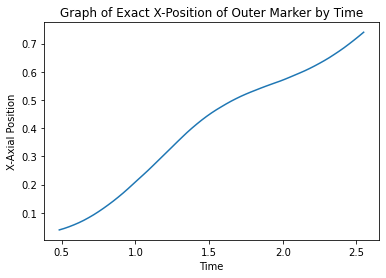

In [67]:
df.rolling(30).mean().plot(x="t", y="x", xlabel="Time", ylabel="X-Axial Position", title="Graph of Exact X-Position of Outer Marker by Time", legend=False)

<AxesSubplot:title={'center':'Graph of Exact Y-Position of Outer Marker by Time'}, xlabel='Time', ylabel='Y-Axial Position'>

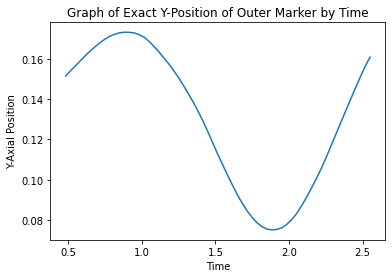

In [65]:
df.rolling(30).mean().plot(x="t", y="y", xlabel="Time", ylabel="Y-Axial Position", title="Graph of Exact Y-Position of Outer Marker by Time", legend=False)

<AxesSubplot:title={'center':'Graph of Exact Position of Outer Marker'}, xlabel='X-Axial Position', ylabel='Y-Axial Position'>

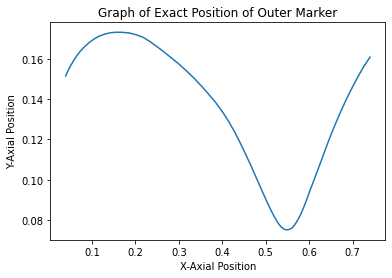

In [69]:
df.rolling(30).mean().plot(x="x", y="y", xlabel="X-Axial Position", ylabel="Y-Axial Position", title="Graph of Exact Position of Outer Marker", legend=False)

<AxesSubplot:xlabel='t'>

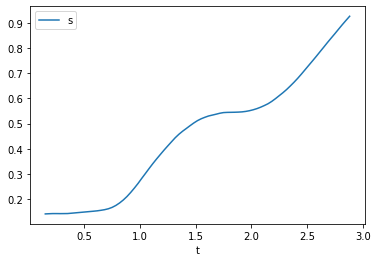

In [115]:
df["s"] = (df.x ** 2 + df.y ** 2)**0.5
df.rolling(10).mean().plot(x="t", y="s")

## Rate of Change

In [37]:
diff = (df.iloc[1:].reset_index()[["t","x","y"]] - df.iloc[:-1].reset_index()[["t","x","y"]]).rename(columns=lambda x:f"d{x}")
diff["t"] = df.t[:-1]
diff = diff.set_index("t")
diff

,dt,dx,dy
t,,,
0.000,0.033,0.00131,0.00131
0.033,0.033,0.003931,0.005241
0.066,0.034,0.0,0.0
0.100,0.033,0.0,0.0
0.133,0.033,0.0,0.0
...,...,...,...
2.866,0.034,0.017033,-0.00131
2.900,0.033,0.026205,-0.00131
2.933,0.033,0.015723,-0.005241


<AxesSubplot:xlabel='t'>

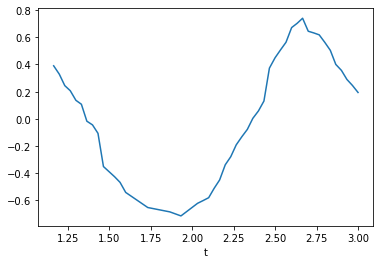

In [97]:
diffsafedydx = diff[diff.dx != 0]
(diffsafedydx.dy / diffsafedydx.dx).rolling(20).mean().plot()

<AxesSubplot:xlabel='t'>

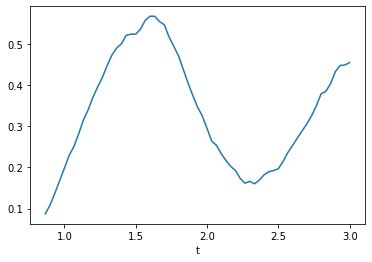

In [105]:
(diff.dx / diff.dt).rolling(27).mean().plot()

<AxesSubplot:xlabel='t'>

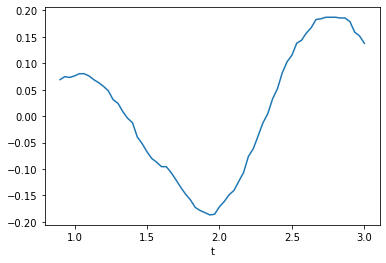

In [59]:
(diff.dy / diff.dt).rolling(28).mean().plot()

In [107]:
diff["ds"] = (diff.dx**2 + diff.dy**2)**0.5
diff

,dt,dx,dy,ds
t,,,,
0.000,0.033,0.00131,0.00131,0.001853
0.033,0.033,0.003931,0.005241,0.006551
0.066,0.034,0.0,0.0,0.0
0.100,0.033,0.0,0.0,0.0
0.133,0.033,0.0,0.0,0.0
...,...,...,...,...
2.866,0.034,0.017033,-0.00131,0.017083
2.900,0.033,0.026205,-0.00131,0.026237
2.933,0.033,0.015723,-0.005241,0.016573


<AxesSubplot:xlabel='t'>

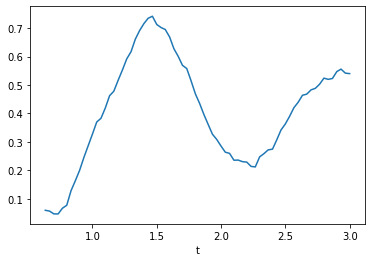

In [109]:
(diff.ds / diff.dt).rolling(20).mean().plot()

In [126]:
import plotly.express as px
import plotly.graph_objects as go

df = df.rolling(30).mean()


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=df.x, y=df.y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=df.x, y=df.y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[0, 1], autorange=False, zeroline=False),
        yaxis=dict(range=[0, 0.5], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[df.x[k]],
            y=[df.y[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(92)]
)

fig.show()


fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

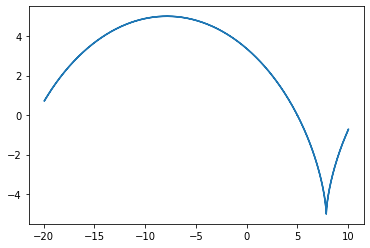

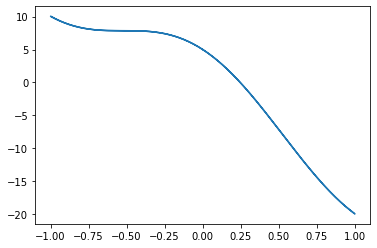

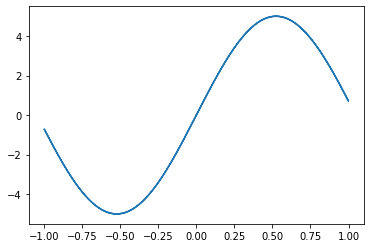

In [125]:
w = 3
r = 5

def tpos(m):
    return np.sin(m)

def xpos(t):
    return r*(np.cos(w*t)-w*t)

def ypos(t):
    return r*np.sin(w*t)

m = np.linspace(0, 2*np.pi, 1000)
t = tpos(m)
x = xpos(t)
y = ypos(t)
plt.plot(x,y)
plt.show()
plt.plot(t,x)
plt.show()
plt.plot(t,y)
plt.show()